# **Analiza danych ankietowych - Sprawozdanie I**

## *Autorzy: Julia Krempińska, Filip Miśkiewicz*

## **Biblioteki**

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import altair as alt
import scipy
import math
import random

from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.stats.proportion import proportion_confint
from scipy.stats import binomtest
from statsmodels.stats.proportion import proportions_ztest

warnings.filterwarnings("ignore")
%matplotlib inline 

## **Część I**

### **Zadanie 1**

In [61]:
df = pd.read_table('ankieta_edit.csv', sep=';')

In [62]:
df.head() #układ tabeli

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK
0,IT,2,Nie,1,-2,1,M,64
1,IT,2,Nie,0,-2,-2,M,67
2,IT,2,Nie,1,2,2,M,65
3,IT,2,Nie,-1,-2,-2,K,68
4,IT,3,Tak,1,2,-1,K,65


In [63]:
df.isnull().values.any() #brak pustych komórek

False

#### W naszych danych nie występują puste wartości. Teraz zajmiemy się przeanalizowaniem czy wszystkie udzielone odpowiedzi pokrywały się z kluczem.

In [64]:
if all(df["DZIAŁ"].isin(["IT", "HR", "MK", "PD"])):
    print("All DZIAŁ values are fine")

if all(df["STAŻ"].isin([1, 0, 1, 2, 3])):
    print("All STAŻ values are fine")

if all(df["CZY_KIER"].isin(["Tak", "Nie"])):
    print("All CZY_KIER values are fine")

if all(df["PYT_1"].isin([-2, -1, 0, 1, 2])):
    print("All PYT_1 values are fine")

if all(df["PYT_2"].isin([-2, -1, 0, 1, 2])):
    print("All PYT_2 values are fine")

if all(df["PŁEĆ"].isin(["K", "M"])):
    print("All PŁEĆ values are fine")

print(df["WIEK"].dtype)

All DZIAŁ values are fine
All STAŻ values are fine
All CZY_KIER values are fine
All PYT_1 values are fine
All PYT_2 values are fine
All PŁEĆ values are fine
int64


##### Widzimy, że dla każdego pytania udzielone odpowiedzi były zgodne z kluczem.

### **Zadanie 2**

#### Zmienną WIEK_KAT tworzymy według poniższego klucza:
* Jeżeli pracownik ma mniej niż 35 lat - zmienna przyjmuje wartość 0;
* Jeżeli pracownik ma więcej niż 35 lat, ale nie więcej niż 45 - zmienna przyjmuje wartość 1;
* Jeżeli pracownik ma więcej niż 45 lat, ale nie więcej niż 55 - zmienna przyjmuje wartość 2;
* Jeżeli pracownik ma więcej niż 55 lat - zmienna przyjmuje wartość 3.

In [65]:
WIEK_KAT = np.zeros(len(df["WIEK"]))
for i in range(len(df["WIEK"])): #sprawdzanie warunków
    if 35 < df["WIEK"][i] <= 45:
        WIEK_KAT[i] = 1
    if 45 < df["WIEK"][i] <= 55:
        WIEK_KAT[i] = 2
    if df["WIEK"][i] > 55:
        WIEK_KAT[i] = 3
df["WIEK_KAT"] = WIEK_KAT
df.tail() #0 jeśli < 35

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT
195,HR,2,Nie,1,2,2,M,42,1.0
196,HR,2,Nie,1,-1,-1,K,35,0.0
197,HR,2,Nie,-1,-2,-2,K,39,1.0
198,HR,2,Nie,1,2,1,K,48,2.0
199,HR,2,Nie,1,2,2,K,42,1.0


### **Zadanie 3**

#### By przedstawić dane w czytelny sposób, tworzymy tablice liczności.

In [66]:
freq_table_dzial = pd.crosstab(df['DZIAŁ'], 'Liczba') / len(df['DZIAŁ'])
freq_table_staz = pd.crosstab(df['STAŻ'], 'Liczba') / len(df['DZIAŁ'])
freq_table_czy_kier = pd.crosstab(df['CZY_KIER'], 'Liczba') / len(df['DZIAŁ'])
freq_table_plec = pd.crosstab(df['PŁEĆ'], 'Liczba') / len(df['DZIAŁ'])
freq_table_PYT_1 = pd.crosstab(df['PYT_1'], 'Liczba') / len(df['DZIAŁ'])
freq_table_PYT_2 = pd.crosstab(df['PYT_2'], 'Liczba') / len(df['DZIAŁ'])
freq_table_wiek_kat = pd.crosstab(df['WIEK_KAT'], 'Liczba') / len(df['DZIAŁ'])

display(freq_table_dzial)

col_0,Liczba
DZIAŁ,
HR,0.155
IT,0.130
MK,0.225
PD,0.490


### TO DO: Wnioski

In [67]:
display(freq_table_staz)

col_0,Liczba
STAŻ,
1,0.205
2,0.700
3,0.095


### TO DO: Wnioski

In [68]:
display(freq_table_czy_kier)

col_0,Liczba
CZY_KIER,
Nie,0.865
Tak,0.135


### TO DO: Wnioski

In [69]:
display(freq_table_plec)

col_0,Liczba
PŁEĆ,
K,0.355
M,0.645


### TO DO: WNIOSKI

In [70]:
display(freq_table_PYT_1)

col_0,Liczba
PYT_1,
-2,0.070
-1,0.085
0,0.200
1,0.500
2,0.145


### TO DO: WNIOSKI

In [71]:
display(freq_table_PYT_2)

col_0,Liczba
PYT_2,
-2,0.37
-1,0.10
1,0.01
2,0.52


### TO DO: WNIOSKI

In [72]:
display(freq_table_wiek_kat)

col_0,Liczba
WIEK_KAT,
0.0,0.130
1.0,0.520
2.0,0.225
3.0,0.125


### TO DO: WNIOSKI

### **Zadanie 4**

#### Innym sposobem przedstawienia naszych danych są wykresy kołowe oraz słupkowe.

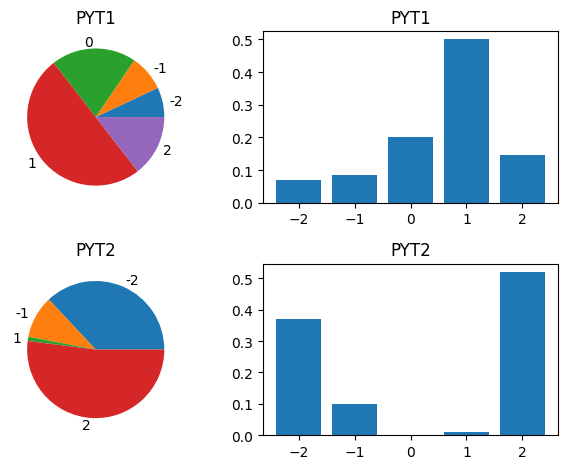

In [73]:
plt.subplot(2,2,1)
plt.pie(freq_table_PYT_1["Liczba"], labels = [-2, -1, 0, 1, 2])
plt.title("PYT1")


plt.subplot(2,2,2)
plt.bar([-2, -1, 0, 1, 2], freq_table_PYT_1["Liczba"])
plt.title("PYT1")


plt.subplot(2,2,3)
plt.pie(freq_table_PYT_2["Liczba"], labels = [-2, -1, 1, 2])
plt.title("PYT2")


plt.subplot(2,2,4)
plt.bar([-2, -1, 1, 2], freq_table_PYT_2["Liczba"])
plt.title("PYT2")


plt.tight_layout()

### TO DO: WNIOSKI

### **Zadanie 5**

#### Tworzymy również tablice wielodzielcze do przedstawienia rozkładu odpowiedzi na pytanie 1 w zależności od działu, stanowiska, płci czy wieku ankietowanych.

In [74]:
df1 = pd.crosstab(df["PYT_1"], df["DZIAŁ"])
df2 = pd.crosstab(df["PYT_1"], df["STAŻ"])
df3 = pd.crosstab(df["PYT_1"], df["CZY_KIER"])
df4 = pd.crosstab(df["PYT_1"], df["PŁEĆ"])
df5 = pd.crosstab(df["PYT_1"], df["WIEK_KAT"])

In [75]:
display(df1)

DZIAŁ,HR,IT,MK,PD
PYT_1,,,,
-2,2,0,3,9
-1,2,2,3,10
0,5,4,14,17
1,19,15,15,51
2,3,5,10,11


### TO DO: WNIOSKI

In [76]:
display(df2)

STAŻ,1,2,3
PYT_1,,,
-2,5,5,4
-1,6,10,1
0,8,26,6
1,19,75,6
2,3,24,2


### TO DO: WNIOSKI

In [77]:
display(df3)

CZY_KIER,Nie,Tak
PYT_1,,
-2,10,4
-1,14,3
0,34,6
1,88,12
2,27,2


### TO DO: WNIOSKI

In [78]:
display(df4)

PŁEĆ,K,M
PYT_1,,
-2,3,11
-1,7,10
0,14,26
1,36,64
2,11,18


### TO DO: WNIOSKI

In [79]:
display(df5)

WIEK_KAT,0.0,1.0,2.0,3.0
PYT_1,,,,
-2,1,11,2,0
-1,6,7,1,3
0,3,24,5,8
1,13,50,25,12
2,3,12,12,2


### TO DO: WNIOSKI

### **Zadanie 6**

In [80]:
df6 = pd.crosstab(df["PYT_2"], df["PYT_3"])

display(df6)

PYT_3,-2,-1,1,2
PYT_2,,,,
-2,49,16,5,4
-1,3,6,10,1
1,0,0,2,0
2,0,8,15,81


### TO DO: WNIOSKI

### **Zadanie 7**

#### Na podstawie odpowiedzi na pytanie 2, tworzymy kolumnę "CZY_ZADOW", która informuje czy odpowiedź była pozytywna, czy negatywna.

In [81]:
CZY_ZADOW = np.zeros(len(df["PYT_2"]))
for i in range(len(df["PYT_2"])):
    CZY_ZADOW[i] = np.sign(df["PYT_2"][i]) #pozytywna odpowiedź > 0, negatywna < 0
df["CZY_ZADOW"] = CZY_ZADOW
df.tail()

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT,CZY_ZADOW
195,HR,2,Nie,1,2,2,M,42,1.0,1.0
196,HR,2,Nie,1,-1,-1,K,35,0.0,-1.0
197,HR,2,Nie,-1,-2,-2,K,39,1.0,-1.0
198,HR,2,Nie,1,2,1,K,48,2.0,1.0
199,HR,2,Nie,1,2,2,K,42,1.0,1.0


### **Zadanie 8**

#### Dla wybranych par zmiennych tworzymy wykresy mozaikowe.

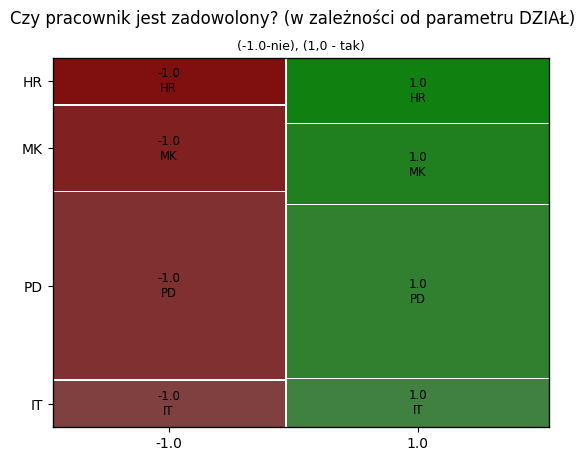

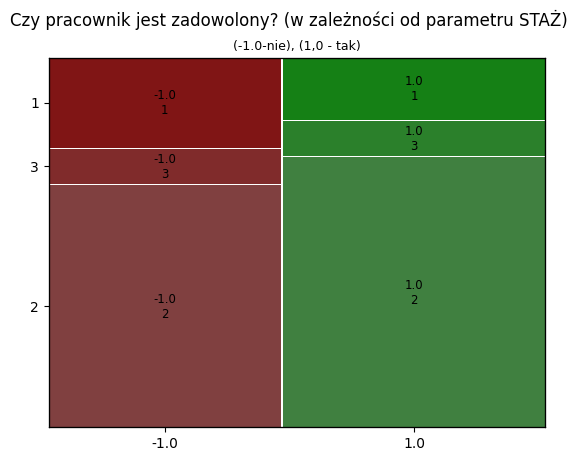

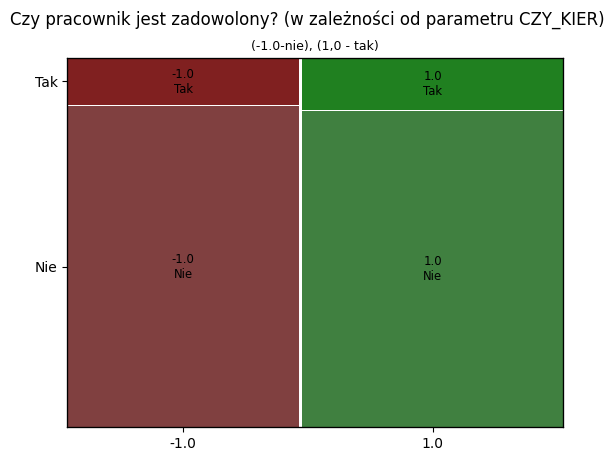

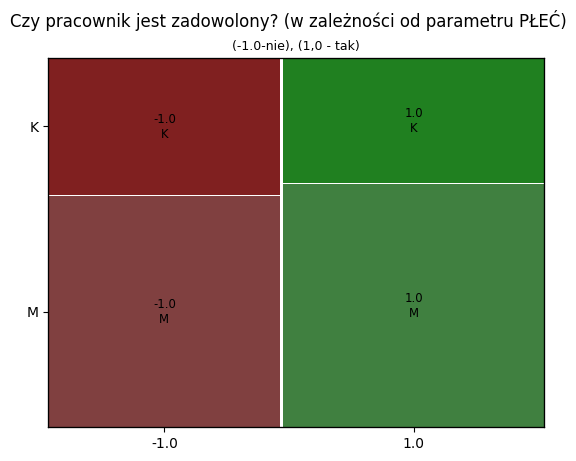

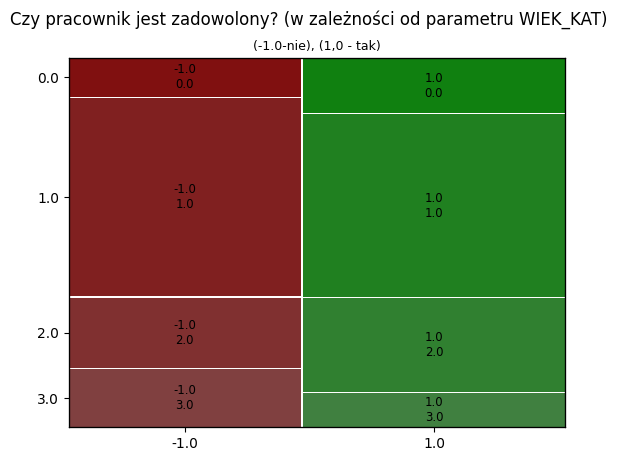

In [82]:
params = ["DZIAŁ", "STAŻ", 'CZY_KIER', 'PŁEĆ', 'WIEK_KAT']
for i in range(len(params)):
    fig = mosaic(df, ['CZY_ZADOW', params[i]], axes_label=True)[0]
    plt.suptitle(f"Czy pracownik jest zadowolony? (w zależności od parametru {params[i]})")
    plt.title("(-1.0-nie), (1,0 - tak)", size=9)
    plt.show()

### TO DO: Wnioski

## **Część II**

### **Zadanie 2**

In [83]:
df1 = df[['PYT_1', 'CZY_KIER']]

labels = {
    -2: "Zdecydowanie się nie zgadzam",
    -1: "Nie zgadzam się",
    0: "Neutralnie",
    1: "Zgadzam się",
    2: "Zdecydowanie się zgadzam"
}
df1['PYT_1_label'] = df1['PYT_1'].map(labels)

overall_chart = (
    alt.Chart(df1)
    .mark_bar()
    .encode(
        x=alt.X('PYT_1_label:O', title='Ocena', sort=list(labels.values())),
        y=alt.Y('count()', title='Liczba odpowiedzi'),
        tooltip=['count()']
    )
    .properties(title='Rozkład odpowiedzi w całej grupie')
)

subgroup_chart = (
    alt.Chart(df1)
    .mark_bar()
    .encode(
        x=alt.X('PYT_1_label:O', title='Ocena', sort=list(labels.values())),
        y=alt.Y('count()', title='Liczba odpowiedzi'),
        color='CZY_KIER:N',
        column=alt.Column('CZY_KIER:N', title='Czy kierownik?'),
        tooltip=['count()']
    )
    .properties(title='Rozkład odpowiedzi w podgrupach')
)

alt.hconcat(overall_chart, subgroup_chart)

alt.HConcatChart(...)

### **Zadanie 3**

In [84]:
with_replacement = np.random.choice(df.index, size=int(0.1 * len(df)), replace=True)
sample_with_replacement = df.loc[with_replacement]

duplicates_with = pd.Series(with_replacement).value_counts()
repeated_with = duplicates_with[duplicates_with > 1]

without_replacement = np.random.choice(df.index, size=int(0.1 * len(df)), replace=False)
sample_without_replacement = df.loc[without_replacement]

duplicates_without = pd.Series(without_replacement).value_counts()
repeated_without = duplicates_without[duplicates_without > 1]

display('Ze zwracaniem:', sample_with_replacement)
print('Powtórzenia (ze zwracaniem):', len(repeated_with))

display('Bez zwracania:', sample_without_replacement)
print('Powtórzenia (bez zwracania):', len(repeated_without))


'Ze zwracaniem:'

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT,CZY_ZADOW
98,PD,2,Nie,1,2,2,M,40,1.0,1.0
88,PD,1,Nie,1,2,2,M,55,2.0,1.0
62,PD,2,Nie,2,2,2,M,50,2.0,1.0
31,PD,1,Nie,0,-2,-2,M,33,0.0,-1.0
16,IT,2,Nie,0,-2,-2,K,45,1.0,-1.0
10,IT,2,Nie,2,-2,-2,K,48,2.0,-1.0
31,PD,1,Nie,0,-2,-2,M,33,0.0,-1.0
15,IT,2,Nie,1,2,2,K,37,1.0,1.0
194,HR,3,Tak,1,2,-1,M,26,0.0,1.0
167,MK,2,Nie,2,2,2,M,38,1.0,1.0


Powtórzenia (ze zwracaniem): 3


'Bez zwracania:'

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT,CZY_ZADOW
195,HR,2,Nie,1,2,2,M,42,1.0,1.0
105,PD,2,Nie,1,2,2,K,36,1.0,1.0
36,PD,1,Nie,2,2,2,M,33,0.0,1.0
191,HR,2,Nie,0,-2,-1,M,64,3.0,-1.0
24,IT,2,Nie,1,-1,-1,K,50,2.0,-1.0
170,HR,3,Nie,-2,-2,-2,M,49,2.0,-1.0
69,PD,2,Tak,-1,2,2,M,34,0.0,1.0
96,PD,2,Nie,-1,-2,-1,M,39,1.0,-1.0
55,PD,2,Nie,2,2,2,M,47,2.0,1.0
50,PD,1,Nie,-2,-2,-1,M,43,1.0,-1.0


Powtórzenia (bez zwracania): 0


### **Zadanie 4**

#### Gęstość rozkładu dwumianowego opisujemy za pomocą wzoru
#### $$ P(N) = \binom{n}{N}p^N(1-p)^{n-N},$$
#### gdzie $n$ oznacza liczbę prób, $N$ liczbę sukcesów oraz $p$ prawdopodobieńśtwo sukcesu.

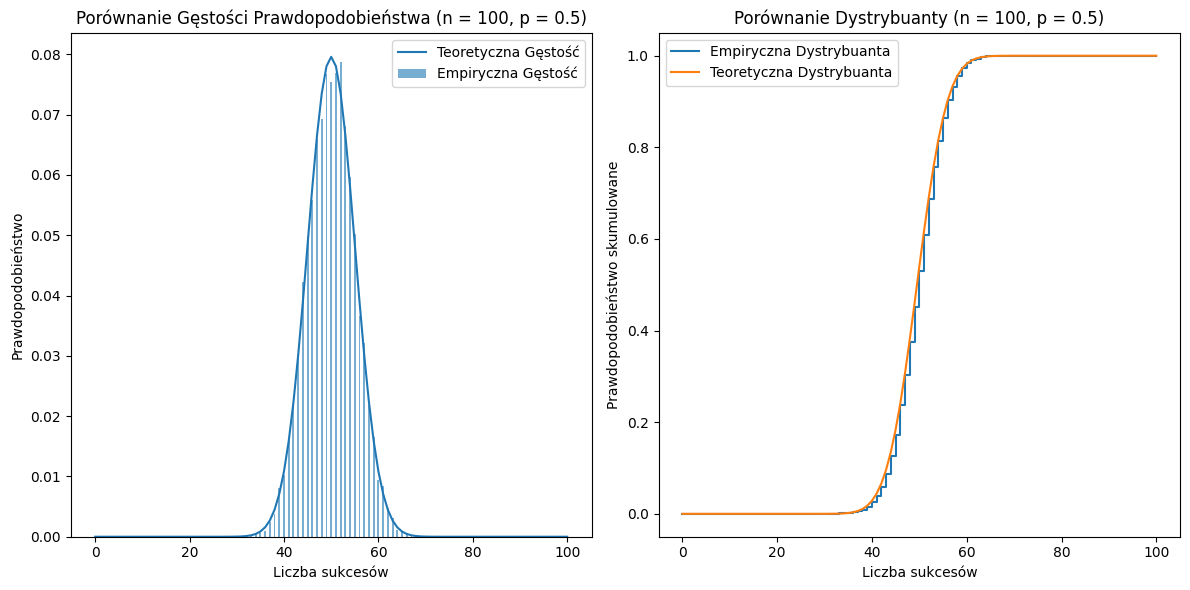

In [85]:
def binomial_coeff(n, k):
    return math.comb(n, k)

def binomial_pdf(n, p, k):
    return binomial_coeff(n, k) * (p ** k) * ((1 - p) ** (n - k))

def empirical_pdf(n, p, M):
    successes_count = [0] * (n + 1)
    
    for _ in range(M):
        successes = binomial_trial(n, p)
        successes_count[successes] += 1
    
    return [count / M for count in successes_count]

def binomial_trial(n, p):
    successes = 0
    for _ in range(n):
        if random.random() < p:
            successes += 1
    return successes

def binomial_cdf(n, p, k):
    return sum(binomial_pdf(n, p, i) for i in range(k + 1))

def empirical_cdf(n, p, M):
    successes_count = [0] * (n + 1)
    
    for _ in range(M):
        successes = binomial_trial(n, p)
        successes_count[successes] += 1
    
    cumulative_count = np.cumsum(successes_count)
    return cumulative_count / M

# Parametry
n = 100  # liczba prób
p = 0.5  # prawdopodobieństwo sukcesu
M = 10000  # liczba prób do symulacji


k_values = list(range(n + 1))
theoretical_pdf = [binomial_pdf(n, p, k) for k in k_values]
theoretical_cdf = [binomial_cdf(n, p, k) for k in k_values]

empirical_pdf_values = empirical_pdf(n, p, M)
empirical_cdf_values = empirical_cdf(n, p, M)



plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(k_values, empirical_pdf_values, width=0.4, alpha=0.6, label="Empiryczna Gęstość")
plt.plot(k_values, theoretical_pdf, label="Teoretyczna Gęstość")
plt.xlabel("Liczba sukcesów")
plt.ylabel("Prawdopodobieństwo")
plt.title(f"Porównanie Gęstości Prawdopodobieństwa (n = {n}, p = {p})")
plt.legend()

plt.subplot(1, 2, 2)
plt.step(k_values, empirical_cdf_values, where="post", label="Empiryczna Dystrybuanta")
plt.plot(k_values, theoretical_cdf, label="Teoretyczna Dystrybuanta")
plt.xlabel("Liczba sukcesów")
plt.ylabel("Prawdopodobieństwo skumulowane")
plt.title(f"Porównanie Dystrybuanty (n = {n}, p = {p})")
plt.legend()

plt.tight_layout()
plt.show()


### **Zadanie 5**

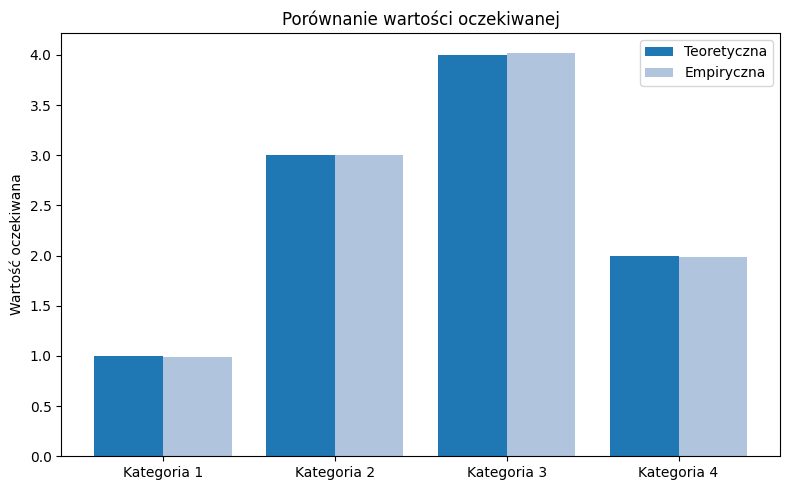

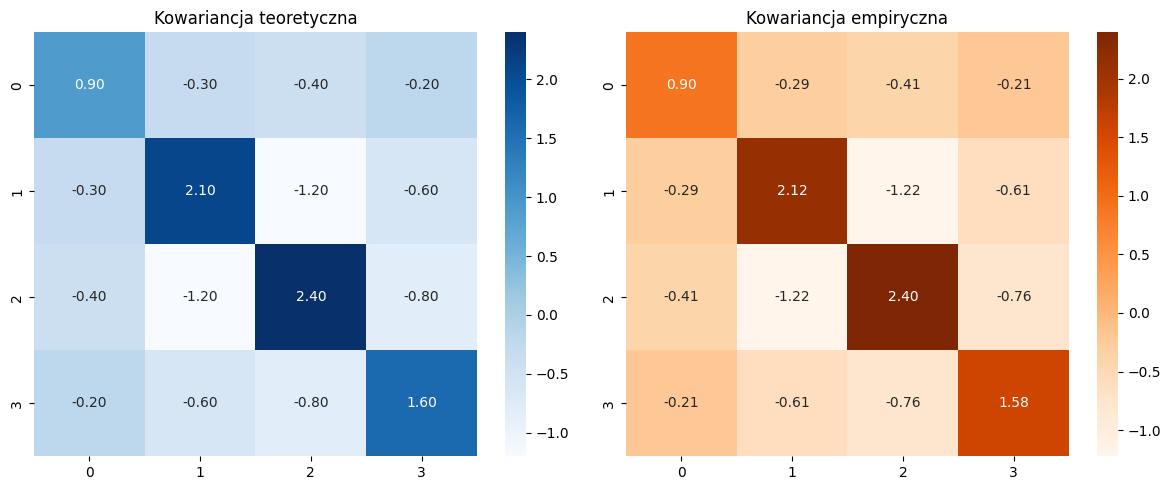

In [86]:
def simulate_multinomial_manual(n, p, num_samples):
    """
    Symuluje próbki z rozkładu wielomianowego bez użycia gotowych funkcji.
    
    Parameters:
        n (int): liczba prób w jednym eksperymencie
        p (list): lista prawdopodobieństw dla każdej kategorii (suma = 1)
        num_samples (int): liczba próbek (eksperymentów)
        
    Returns:
        samples (ndarray): macierz wyników (num_samples x len(p))
    """
    categories = len(p)
    p = np.array(p)
    cumulative_p = np.cumsum(p)
    
    samples = np.zeros((num_samples, categories), dtype=int)
    
    for i in range(num_samples):
        count = np.zeros(categories, dtype=int)
        for _ in range(n):
            r = np.random.rand()
            for j in range(categories):
                if r < cumulative_p[j]:
                    count[j] += 1
                    break
        samples[i] = count
        
    return samples

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parametry
n = 10
p = [0.1, 0.3, 0.4, 0.2]
num_samples = 10000

samples = simulate_multinomial_manual(n, p, num_samples)

mean_theoretical = n * np.array(p)
cov_theoretical = n * (np.diag(p) - np.outer(p, p))
mean_empirical = np.mean(samples, axis=0)
cov_empirical = np.cov(samples, rowvar=False)

categories = [f"Kategoria {i+1}" for i in range(len(p))]
x = np.arange(len(p))

plt.figure(figsize=(8, 5))
plt.bar(x - 0.2, mean_theoretical, width=0.4, label='Teoretyczna')
plt.bar(x + 0.2, mean_empirical, color="lightsteelblue", width=0.4, label='Empiryczna')
plt.xticks(x, categories)
plt.ylabel("Wartość oczekiwana")
plt.title("Porównanie wartości oczekiwanej")
plt.legend()
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cov_theoretical, annot=True, fmt=".2f", cmap="Blues", ax=axes[0])
axes[0].set_title("Kowariancja teoretyczna")

sns.heatmap(cov_empirical, annot=True, fmt=".2f", cmap="Oranges", ax=axes[1])
axes[1].set_title("Kowariancja empiryczna")

plt.tight_layout()
plt.show()


## **Część III i IV**

### **Zadanie 6**

#### Definiujemy funkcję do wyznaczania realizacji przedziałów ufności Cloppera-Pearsona.

In [87]:
def clopper_pearson(successes, trials, alpha=0.05): #liczba sukcesów, liczba prób, poziom ufności
    beta_ppf = scipy.stats.beta.ppf #punktowa funkcja procentowa zmiennej beta
    low = beta_ppf(alpha / 2, successes, trials - successes + 1) #dolna granica
    high = beta_ppf(1 - alpha / 2, successes + 1, trials - successes) # górna granica
    
    if math.isnan(low): 
        low = 0
    if math.isnan(high):
        high = 1
    
    return [low, high]

### **Zadanie 7**

#### Przed wyznaczeniem realizacji przedziałów ufności, tworzymy kolumnę "CZY_ZADOW_2", która informuje czy ankietowany był zadowolony na podstawie jego odpowiedzi do pytania numer 3.

In [88]:
CZY_ZADOW_2 = np.zeros(len(df["PYT_3"]))
for i in range(len(df["PYT_3"])):
    CZY_ZADOW_2[i] = np.sign(df["PYT_3"][i]) #jeżeli ankietowany jest zadowolony, to jego odpowiedź jest dodatnia
df["CZY_ZADOW_2"] = CZY_ZADOW_2
df.tail()

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT,CZY_ZADOW,CZY_ZADOW_2
195,HR,2,Nie,1,2,2,M,42,1.0,1.0,1.0
196,HR,2,Nie,1,-1,-1,K,35,0.0,-1.0,-1.0
197,HR,2,Nie,-1,-2,-2,K,39,1.0,-1.0,-1.0
198,HR,2,Nie,1,2,1,K,48,2.0,1.0,1.0
199,HR,2,Nie,1,2,2,K,42,1.0,1.0,1.0


#### W analizowanym przypadku liczba prób jest równa liczbie udzielonych odpowiedzi, natomiast za sukces traktujemy każdą pozytywną odpowiedź.

In [89]:
n_1 = len(df["PYT_2"])
n_2 = len(df["PYT_3"])
positive_1 = len(df.query('CZY_ZADOW > 0')) #sumujemy liczbę dodatnich wartości (zadowolonych ankietowanych)
positive_2 = len(df.query('CZY_ZADOW_2 > 0')) #sumujemy liczbę dodatnich wartości (zadowolonych ankietowanych)

In [90]:
confidence_interval_czy_zadow = clopper_pearson(positive_1, n_1)
print(f"For CZY_ZADOW confidence interval is: low: {confidence_interval_czy_zadow[0]}, high: {confidence_interval_czy_zadow[1]}")

confidence_interval_czy_zadow_2 = clopper_pearson(positive_2, n_2)
print(f"For CZY_ZADOW_2 confidence interval is: low: {confidence_interval_czy_zadow_2[0]}, high: {confidence_interval_czy_zadow_2[1]}")

For CZY_ZADOW confidence interval is: low: 0.458330500411475, high: 0.6007670588028855
For CZY_ZADOW_2 confidence interval is: low: 0.5184215852127789, high: 0.6588693543285322


### TO DO: WNIOSKI

### **Zadanie 8**

#### Aby generować próbki z rozkładu dwumianowego w Pythonie, możemy użyć biblioteki NumPy.

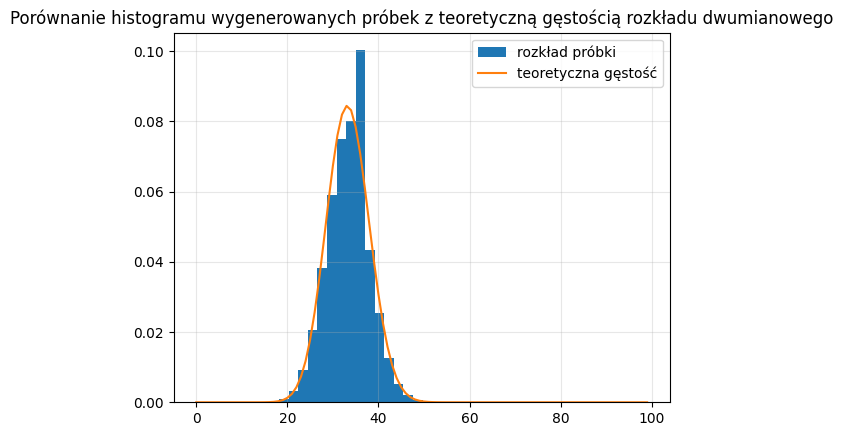

In [91]:
n = 100 #liczba prób
N = np.linspace(0,n, 101, endpoint=True) #0,1,2,...,100
p = 1/3 #prawdopodobieńśtwo sukcesu

theoretical_density = np.zeros(n)
for i in range(n):
    theoretical_density[i] = scipy.special.binom(n, N[i])*p**N[i]*(1-p)**(n-N[i]) #teoretyczna gęstość wyznaczona ze wzoru powyżej

samples = np.random.binomial(n, p, 100000) #wygenerowanie dużej liczby próbek

plt.hist(samples, density=True, label = "rozkład próbki", bins=20)
plt.plot(theoretical_density, label = "teoretyczna gęstość")
plt.grid(alpha=0.3)
plt.title("Porównanie histogramu wygenerowanych próbek z teoretyczną gęstością rozkładu dwumianowego")
plt.legend()

### **Zadanie 9**

## **Część V**

### **Zadanie 10**

In [92]:
result = binomtest(3, n=15, p=0.1, alternative='greater')
display(result.pvalue)

0.18406106910639122

In [93]:
count = np.array([5, 12])
nobs = np.array([83, 99])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))

0.159


### **Zadanie 11**

#### 1. Prawdopodobieństwo, że w firmie pracuje kobieta wynosi 0.5.

In [94]:
def check_p_value(p_value):
    if p_value < 0.05:
        print('Hipoteza zerowa może zostać odrzucona')
    else:
        print('Hipoteza zerowa nie może zostać odrzucona')

In [95]:
k = len(df[df['PŁEĆ'] == 'K'])
n = len(df)
p = 0.5
result = binomtest(k, n, p, alternative='two-sided')
p_value = result.pvalue
print(p_value)
check_p_value(p_value)

4.97297347921355e-05
Hipoteza zerowa może zostać odrzucona


In [96]:
stat, pval = proportions_ztest(k, n, p, alternative='two-sided')
print(pval)
check_p_value(pval)

1.8243011136745864e-05
Hipoteza zerowa może zostać odrzucona


#### 2. Prawdopodobieństwo, że pracownik uważa szkolenia za przystosowane do swoich potrzeb w pierwszym badanym okresie jest większe bądź równe 0.7.

In [97]:
k = len(df[(df['PYT_2'] == 1) | (df['PYT_2'] == 2)])
n = len(df)
p = 0.7
result = binomtest(k, n, p, alternative='less')
p_value = result.pvalue
print(p_value)
check_p_value(p_value)

3.212876740960112e-07
Hipoteza zerowa może zostać odrzucona


In [98]:
stat, pval = proportions_ztest(k, n, p, alternative='smaller')
print(pval)
check_p_value(pval)

7.286468776023958e-07
Hipoteza zerowa może zostać odrzucona


#### 3. Prawdopodobieństwo, że kobieta pracuje na stanowisku kierowniczym jest równe prawdopodobieństwu, że mężczyzna pracuje na stanowisku kierowniczym.

In [99]:
k1 = len(df[(df['CZY_KIER'] == 'Tak') & (df['PŁEĆ'] == 'M')])
n1 = len(df[df['PŁEĆ'] == 'M'])
p = k1/n1
k = len(df[(df['CZY_KIER'] == 'Tak') & (df['PŁEĆ'] == 'K')])
n = len(df[df['PŁEĆ'] == 'K'])
result = binomtest(k, n, p, alternative='two-sided')
p_value = result.pvalue
print(p_value)
check_p_value(p_value)

0.5040620681066837
Hipoteza zerowa nie może zostać odrzucona


In [100]:
stat, pval = proportions_ztest(k, n, p, alternative='two-sided')
print(pval)
check_p_value(pval)

0.35635965611973397
Hipoteza zerowa nie może zostać odrzucona


#### 4. Prawdopodobieństwo, że kobieta uważa szkolenia za przystosowane do swoich potrzeb w pierwszym badanym okresie jest równe prawdopodobieństwu, że mężczyzna uważa szkolenia za przystosowane do swoich potrzeb w pierwszym badanym okresie.

In [101]:
k1 = len(df[(df['PYT_2'] <= 1) & (df['PŁEĆ'] == 'M')])
n1 = len(df[df['PŁEĆ'] == 'M'])
p = k1/n1
k = len(df[(df['PYT_2'] <= 1) & (df['PŁEĆ'] == 'K')])
n = len(df[df['PŁEĆ'] == 'K'])
result = binomtest(k, n, p, alternative='two-sided')
p_value = result.pvalue
print(p_value)
check_p_value(p_value)

0.47862248077440184
Hipoteza zerowa nie może zostać odrzucona


In [102]:
stat, pval = proportions_ztest(k, n, p, alternative='two-sided')
print(pval)
check_p_value(pval)

0.4798031720910073
Hipoteza zerowa nie może zostać odrzucona


#### 5. Prawdopodobieństwo, że kobieta pracuje w dziale zasobów ludzkich jest większe lub równe prawdopodobieństwu, że mężczyzna pracuje w dziale zasobów ludzkich.

In [103]:
k1 = len(df[(df['DZIAŁ'] == 'HR') & (df['PŁEĆ'] == 'M')])
n1 = len(df[df['PŁEĆ'] == 'M'])
p = k1/n1
k = len(df[(df['DZIAŁ'] == 'HR') & (df['PŁEĆ'] == 'K')])
n = len(df[df['PŁEĆ'] == 'K'])
result = binomtest(k, n, p, alternative='less')
p_value = result.pvalue
print(p_value)
check_p_value(p_value)

0.0003456683038890572
Hipoteza zerowa może zostać odrzucona


In [104]:
stat, pval = proportions_ztest(k, n, p, alternative='smaller')
print(pval)
check_p_value(pval)

1.135483190810861e-08
Hipoteza zerowa może zostać odrzucona


### **Zadanie 11**

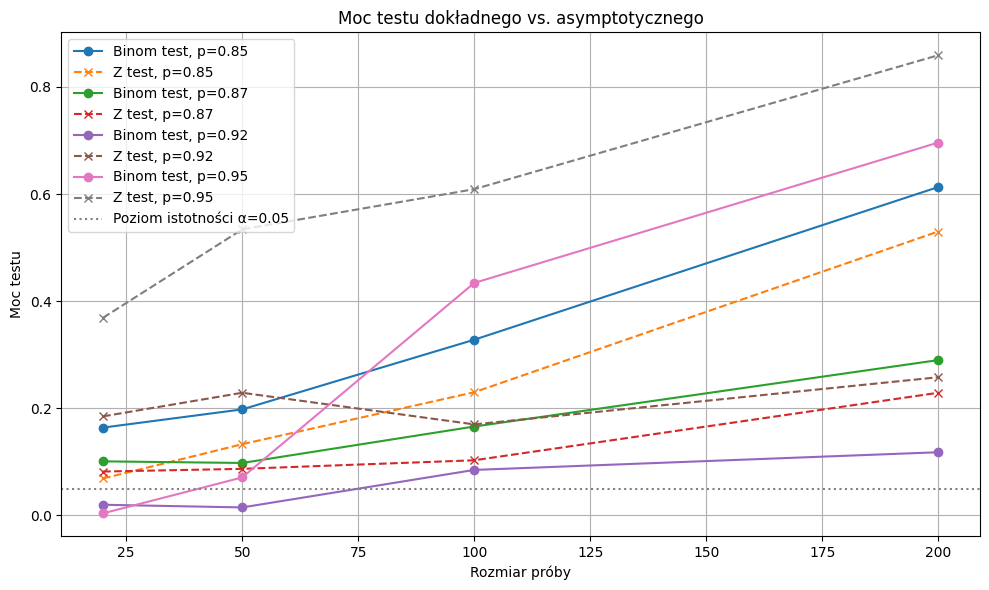

In [107]:
alpha = 0.05
p_null = 0.9
alternative_ps = [0.85, 0.87, 0.92, 0.95]
sample_sizes = [20, 50, 100, 200]
n_simulations = 1000

results = []

for p_alt in alternative_ps:
    for n in sample_sizes:
        rejections_binom = 0
        rejections_z = 0

        for _ in range(n_simulations):
            sample = np.random.binomial(n, p_alt)

            test_binom = binomtest(sample, n, p=p_null, alternative='two-sided')
            if test_binom.pvalue < alpha:
                rejections_binom += 1

            stat, pval = proportions_ztest(sample, n, value=p_null, alternative='two-sided')
            if pval < alpha:
                rejections_z += 1

        power_binom = rejections_binom / n_simulations
        power_z = rejections_z / n_simulations
        results.append((p_alt, n, power_binom, power_z))

df = pd.DataFrame(results, columns=['p_alt', 'sample_size', 'power_binom', 'power_z'])

fig, ax = plt.subplots(figsize=(10, 6))

for p in alternative_ps:
    subset = df[df['p_alt'] == p]
    ax.plot(subset['sample_size'], subset['power_binom'], marker='o', label=f'Binom test, p={p}')
    ax.plot(subset['sample_size'], subset['power_z'], marker='x', linestyle='--', label=f'Z test, p={p}')

ax.set_title('Moc testu dokładnego vs. asymptotycznego')
ax.set_xlabel('Rozmiar próby')
ax.set_ylabel('Moc testu')
ax.axhline(0.05, color='gray', linestyle=':', label='Poziom istotności α=0.05')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

##### Wnioski

1. Moc testu rośnie wraz z rozmiarem próby
Zarówno dla testów dokładnych, jak i asymptotycznych, im większy rozmiar próby, tym większa moc testu.
Szczególnie widoczne dla wartości p=0.95, gdzie moc testu Z i testu dokładnego wzrasta do ponad 0.6 i 0.9.

2. Test Z zazwyczaj ma większą moc dla większych wartości p (np. p=0.95)
Dla p=0.95, Z test znacznie szybciej osiąga wysoką moc niż Binom test.
Sugeruje to, że test Z może być bardziej czuły przy większych efektach (większe różnice od hipotezy zerowej).

3. Test dokładny (Binom) może być bardziej konserwatywny dla małych p
Dla p=0.85 i p=0.87 test Binom ma większą moc niż test Z.
Szczególnie dla małych prób (np. 25, 50), test Binom wypada lepiej lub porównywalnie.

4. Dla niskich wartości p i małych prób test Z może mieć zawyżoną moc
Widać, że test Z dla p=0.92 przy próbie 25 ma relatywnie wysoką moc (~0.2), a potem maleje.
Może to wskazywać na niestabilność oszacowania mocy przy małych próbach – test Z nie jest zalecany dla bardzo małych próbek.

5. Linia przerywana – poziom istotności (α=0.05)
Przypomina, że moc testu powinna być znacznie większa niż poziom istotności, aby test był użyteczny.
Gdy linie znajdują się poniżej tej wartości, oznacza to praktycznie brak mocy (duża szansa na błąd II rodzaju – nie wykrycie efektu, który istnieje).